In [12]:
import pandas as pd
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set your Kaggle API credentials
os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\HP\.kaggle"

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the chronic kidney disease dataset
api.dataset_download_files('yasserhessein/chronic-kidney-disease', path='./data', unzip=True)

# Load the dataset into a DataFrame
data = pd.read_csv('./data/kidney_disease.csv')

# Check the first few rows
data.to_csv('kidney_disease_clean.csv', index=False)

Dataset URL: https://www.kaggle.com/datasets/yasserhessein/chronic-kidney-disease


In [2]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)
# data.columns(subset = [categorical_data])

rbc
pc
pcc
ba
pcv
wc
rc
htn
dm
cad
appet
pe
ane
classification


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [3]:
data[['pcv', 'wc', 'rc']] = data[['pcv', 'wc', 'rc']].apply(pd.to_numeric, errors='coerce')

In [4]:
print(data.isna().sum().sum())

1012


In [5]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(data[col].nunique(col), data[col].value_counts())
        print('='*40)

2 rbc
normal      201
abnormal     47
Name: count, dtype: int64
2 pc
normal      259
abnormal     76
Name: count, dtype: int64
2 pcc
notpresent    354
present        42
Name: count, dtype: int64
2 ba
notpresent    374
present        22
Name: count, dtype: int64
2 htn
no     251
yes    147
Name: count, dtype: int64
5 dm
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64
3 cad
no      362
yes      34
\tno      2
Name: count, dtype: int64
2 appet
good    317
poor     82
Name: count, dtype: int64
2 pe
no     323
yes     76
Name: count, dtype: int64
2 ane
no     339
yes     60
Name: count, dtype: int64
3 classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


### Strip/Clean Any White Space

In [6]:
import numpy as np

# List of categorical columns (update this list if needed)
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for col in categorical_columns:
    data[col] = data[col].astype(str).str.strip()  # Clean any extra whitespace
    print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'rbc': ['nan' 'normal' 'abnormal']
Unique values in 'pc': ['normal' 'abnormal' 'nan']
Unique values in 'pcc': ['notpresent' 'present' 'nan']
Unique values in 'ba': ['notpresent' 'present' 'nan']
Unique values in 'htn': ['yes' 'no' 'nan']
Unique values in 'dm': ['yes' 'no' 'nan']
Unique values in 'cad': ['no' 'yes' 'nan']
Unique values in 'appet': ['good' 'poor' 'nan']
Unique values in 'pe': ['no' 'yes' 'nan']
Unique values in 'ane': ['no' 'yes' 'nan']
Unique values in 'classification': ['ckd' 'notckd']


### Imputation of Missing Values

In [7]:
# print(data.isnull().sum().sum()/len(data))
data.dropna(thresh = 10)

for col in data.columns:
    if data[col].dtype == object:
        data.fillna(data[col].mode()[0], inplace = True)
    else:
        data.fillna(data[col].median(), inplace = True)

### Descriptive Statistics

In [8]:
data.describe().round(2)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.00,400.00,400.00,400.00,400.00,400.00,400.0,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,199.50,54.81,80.16,24.34,23.84,24.83,153.7,64.17,11.42,151.01,47.50,36.83,67.39,6231.37,68.50
std,115.61,27.77,24.96,63.99,63.41,65.35,76.5,57.83,40.07,27.20,80.88,63.02,61.98,4417.84,91.53
min,0.00,2.00,50.00,1.00,0.00,0.00,22.0,1.50,0.40,4.50,2.50,3.10,9.00,199.50,2.10
25%,99.75,42.00,70.00,1.01,0.00,0.00,101.0,27.00,0.90,135.00,4.00,10.88,34.00,199.50,4.50
50%,199.50,55.00,80.00,1.02,1.00,0.00,126.0,44.00,1.40,140.00,4.70,13.50,42.00,6900.00,5.40
75%,299.25,65.00,80.00,1.02,3.00,1.00,199.5,74.25,3.21,150.00,5.82,15.80,51.25,9400.00,199.50
max,399.00,199.50,199.50,199.50,199.50,199.50,490.0,391.00,199.50,199.50,199.50,199.50,199.50,26400.00,199.50


### Correlation Matrix

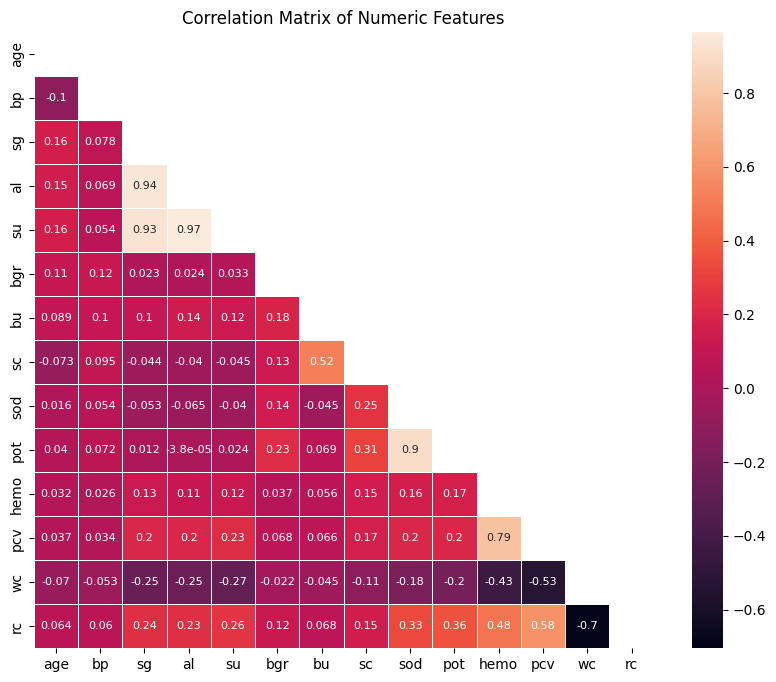

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_data = data.select_dtypes(include = 'number').drop('id', axis = 1)

corr_matrix = numeric_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, mask = mask, annot = True, linewidths = 0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [11]:
numeric_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

### Visualization 

In [10]:
data=data.drop(columns = ['al', 'su', 'pot', 'id'], axis = 1)

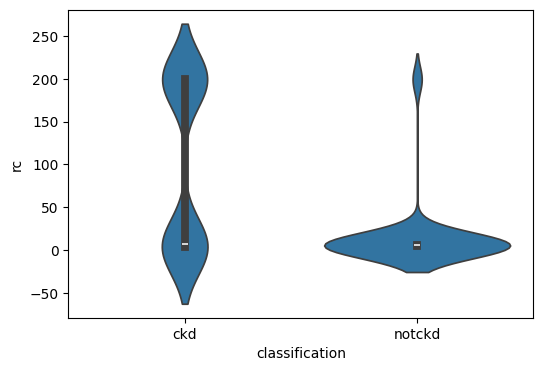

In [11]:
plt.figure(figsize = (6,4))
sns.violinplot(x='classification', y='rc', data=data)
plt.show()

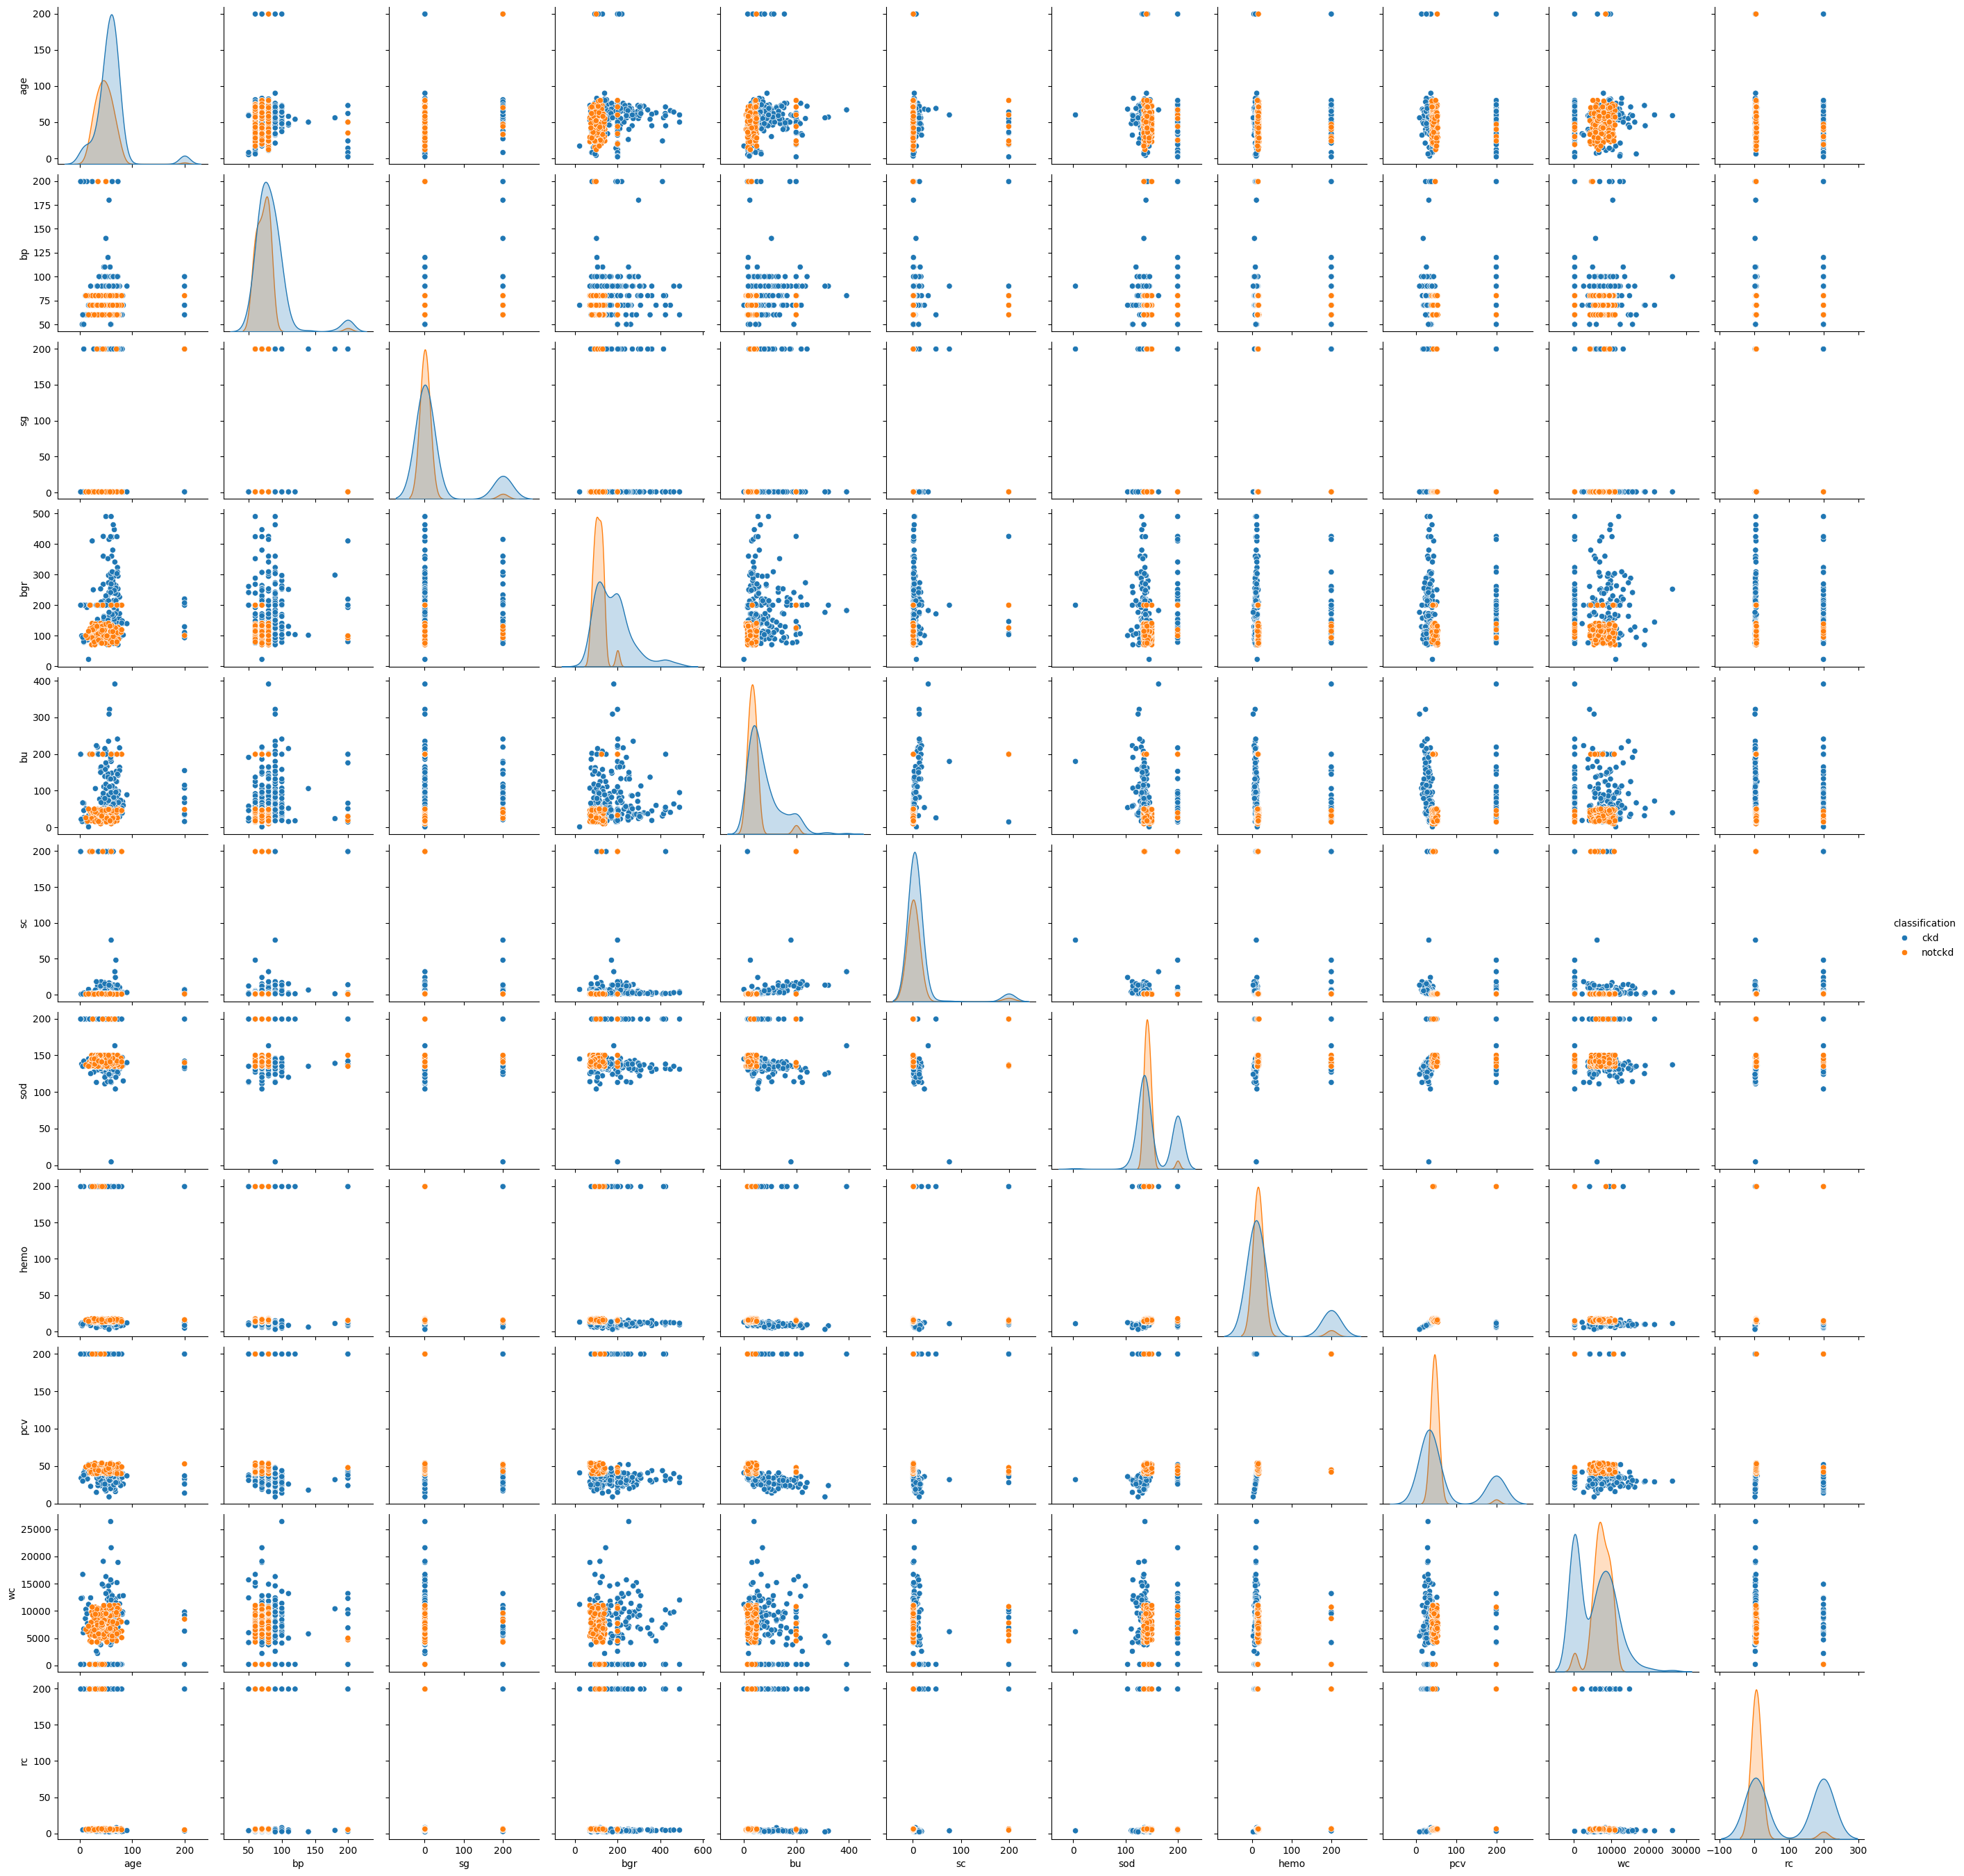

In [16]:
import seaborn as sns

sns.pairplot(data=data, hue='classification', diag_kind='kde')
plt.show()

In [119]:
# data['htn'].drop(data.iloc[288:297].index)
datadata.index[[288, 297]]

Index([288, 297], dtype='int64')

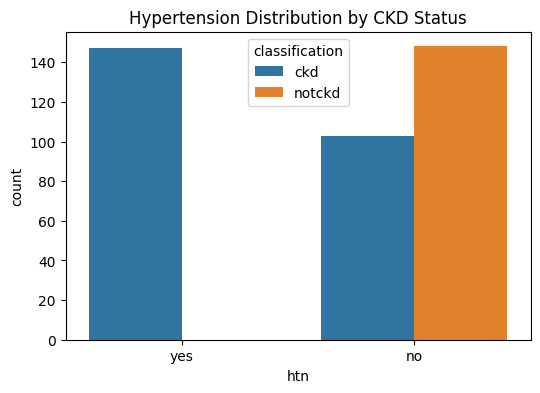

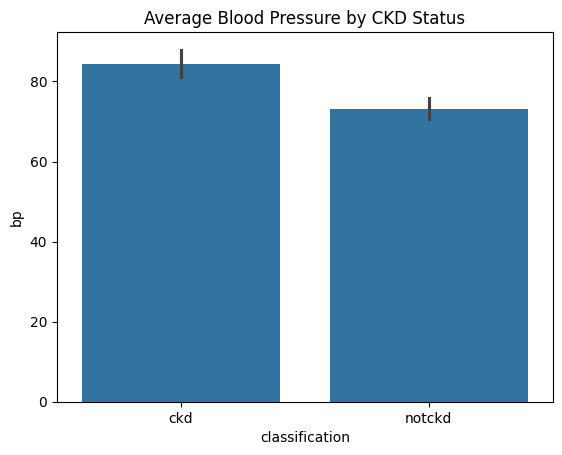

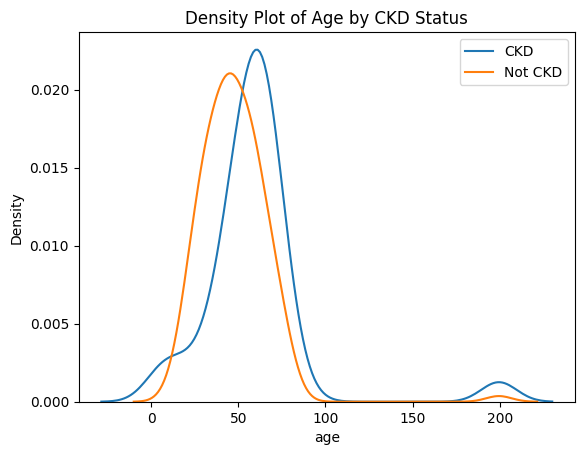

In [148]:
# Countplot for Hypertension

# data['htn'].drop(data.index[[288, 297]])
plt.figure(figsize = (6, 4))
sns.countplot(x='htn', hue='classification', data = data[data['htn'] != 'nan'])
plt.title('Hypertension Distribution by CKD Status')
plt.show()

# Barplot for Blood Pressure
sns.barplot(x='classification', y='bp', data=data)
plt.title('Average Blood Pressure by CKD Status')
plt.show()

# KDE Plot for Age
sns.kdeplot(data.loc[data['classification'] == 'ckd', 'age'], label='CKD')
sns.kdeplot(data.loc[data['classification'] == 'notckd', 'age'], label='Not CKD')
plt.title('Density Plot of Age by CKD Status')
plt.legend()
plt.show()

## Encoding of Categrical Data

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for col in categorical_columns:
    enc = LabelEncoder()
    data[col] = enc.fit_transform(data[col])
# for col in data.columns:
    # if data[col].dtype == 'object':
        # data[col + '_encoded'] = enc.fit_transform(data[col])

### Normalization of Data

In [18]:
import numpy as np

data1 = data.drop(columns = ['classification'])
data_normalize = (data1 - data1.min())/(data1.max() - data1.min())

In [151]:
data_normalize.head()

,age,bp,sg,rbc,pc,pcc,ba,bgr,bu,sc,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.232911,0.200669,0.000076,0.5,1.0,0.5,0.5,0.211538,0.088575,0.004018,...,0.062627,0.183727,0.290090,0.015704,1.0,1.0,0.5,0.0,0.5,0.5
1,0.025316,0.000000,0.000076,0.5,1.0,0.5,0.5,0.379274,0.042362,0.002009,...,0.041752,0.152231,0.221389,1.000000,0.5,0.5,0.5,0.0,0.5,0.5
2,0.303797,0.200669,0.000025,1.0,1.0,0.5,0.5,0.856838,0.132221,0.007032,...,0.033096,0.115486,0.278640,1.000000,0.5,1.0,0.5,1.0,0.5,1.0
3,0.232911,0.133779,0.000000,1.0,0.0,1.0,0.5,0.202991,0.139923,0.017077,...,0.041242,0.120735,0.248106,0.009119,1.0,0.5,0.5,1.0,1.0,1.0
4,0.248101,0.200669,0.000025,1.0,1.0,0.5,0.5,0.179487,0.062901,0.005023,...,0.043279,0.136483,0.271006,0.012665,0.5,0.5,0.5,0.0,0.5,0.5


### Data Splitting 

In [152]:
from sklearn.model_selection import train_test_split

X = data_normalize          # Features (X)
y = data['classification']  # Target (y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (320, 21)
y_train shape: (320,)
X_test shape: (80, 21)
y_test shape: (80,)


### Model Selection

In [153]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {"Random Forest" : RandomForestClassifier(random_state = 42),
          "XGBoost" : XGBClassifier(random_state = 42)
         }

### Hyperparameters

In [154]:
hyperparameters = {
    "Random Forest" : {
        "n_estimators" : [50, 100, 200],
    "max_depth" : [5, 10, None],
    },
    "XGBoost" : {"learning_rate" : [0.01, 0.1, 0.2],
    "max_depth" : [5, 10, None]  
    }   
}

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(estimator=model,
                        param_grid=hyperparameters[model_name],  # Correct parameter name here
                        cv=3, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best Accuracy for {model_name}: {grid.best_score_: .2f}\n")

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 50}
Best Accuracy for Random Forest:  0.99

Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5}
Best Accuracy for XGBoost:  0.98



### Accuracy Score

In [157]:
from sklearn.metrics import accuracy_score

# Assuming you have the best models stored in a dictionary (best_models) and the test set (X_test, y_test)
for model_name, model in best_models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {test_accuracy: .2f}")

Test Accuracy for Random Forest:  1.00
Test Accuracy for XGBoost:  0.99


### Classification Report

In [158]:
from sklearn.metrics import classification_report

# Assuming you've already defined the best models after grid search:
best_models = {
    'Random Forest': grid.best_estimator_,  # RandomForestClassifier with the best parameters
    'XGBoost': grid.best_estimator_  # XGBoost model with the best parameters
}

# Assuming you have the test set (X_test, y_test)
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {test_accuracy: .2f}")
    
    # Calculate the classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

Evaluating Random Forest...
Test Accuracy for Random Forest:  0.99
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Evaluating XGBoost...
Test Accuracy for XGBoost:  0.99
Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



### Feature Importance 

In [159]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rfc = model.fit(X_train, y_train)
feature_names = X.columns
importances = model.feature_importances_
print('feature importance:', importances)

feature importance: [0.01368451 0.013577   0.10950322 0.12391456 0.02290765 0.00189248
 0.00134627 0.05143706 0.02550811 0.22492793 0.01872986 0.15188958
 0.07998602 0.02087156 0.03453265 0.03485405 0.05065206 0.00032083
 0.00777155 0.01039381 0.00129923]


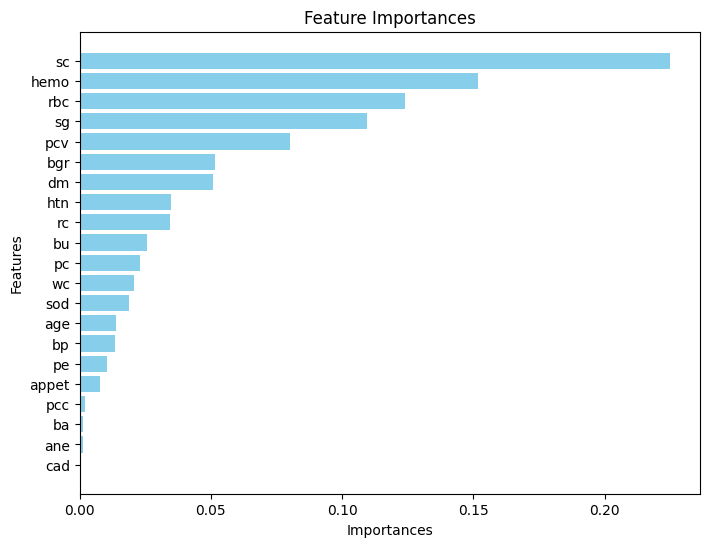

In [160]:
import matplotlib.pyplot as plt

# Convert feature importances arary to DataFrame
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features in order of importance
feature_importance = feature_importance.sort_values('importance', ascending=True).reset_index(drop=True)

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

### ROC-AUC Curve

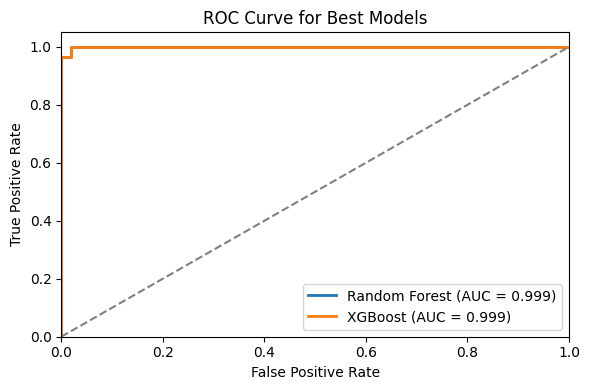

In [162]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Evaluate best models
plt.figure(figsize=(6, 4))

for model_name, model in best_models.items():
    
    # Predict class labels
    y_pred = model.predict(X_test)
    
    # Predict probabilities for class 1
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.3f})")

# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Confusion Matrix for the Models


Evaluating Confusion Matrix for Random Forest...


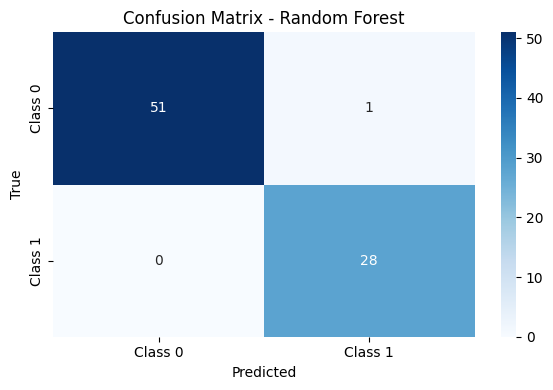


Evaluating Confusion Matrix for XGBoost...


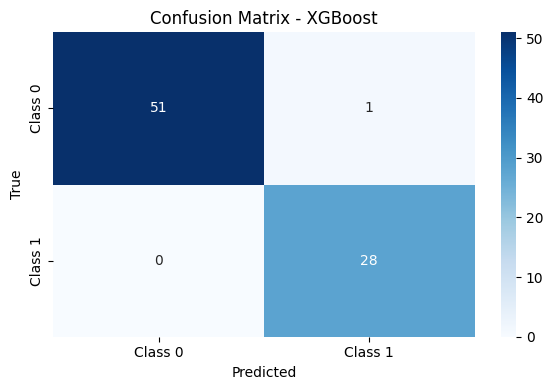

In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

for model_name, model in best_models.items():
    print(f"\nEvaluating Confusion Matrix for {model_name}...")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Class 0", "Class 1"], 
                yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

In [21]:
data.columns

Index(['age', 'bp', 'sg', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [20]:
data.to_csv(r"C:\Users\HP\Desktop\python\CKD_data.csv" ,index = False)